Checking diffrent model

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import  classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [9]:
data = pd.read_csv('normalized_data.csv')
print("shape of data ", data.shape)
data.head(10)


shape of data  (7672, 385)


,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,384
0,0.239988,0.259463,0.574483,0.293069,0.206354,0.244249,0.281445,0.436066,0.817526,0.733397,...,0.001409,0.003379,0.001212,0.000932,0.002144,0.001980,0.003002,0.007863,0.000218,1.0
1,0.243033,0.264065,0.579861,0.296870,0.208972,0.241986,0.279818,0.439683,0.821544,0.738303,...,0.001595,0.003635,0.001421,0.001101,0.002471,0.002188,0.004055,0.007392,0.000216,1.0
2,0.242807,0.264010,0.582515,0.300718,0.213249,0.241813,0.284666,0.452198,0.824719,0.745103,...,0.002842,0.007926,0.005327,0.003033,0.005329,0.002977,0.009598,0.013810,0.001838,1.0
3,0.245461,0.268181,0.588624,0.301358,0.213316,0.237998,0.286499,0.458214,0.826853,0.749522,...,0.003670,0.009295,0.006034,0.003540,0.006628,0.003176,0.010093,0.015042,0.001820,1.0
4,0.245521,0.268637,0.593255,0.300680,0.211029,0.235981,0.287783,0.459979,0.827535,0.751488,...,0.004331,0.010430,0.006368,0.003788,0.007624,0.003214,0.009299,0.014804,0.001804,1.0
5,0.237593,0.256506,0.583140,0.283492,0.196757,0.223813,0.273793,0.445421,0.817745,0.739563,...,0.003526,0.005897,0.001882,0.001546,0.004876,0.002363,0.002215,0.003817,0.000020,1.0
6,0.233880,0.251165,0.584647,0.287900,0.199384,0.230294,0.280293,0.447513,0.817557,0.738258,...,0.003741,0.007800,0.002205,0.001869,0.004978,0.002170,0.002315,0.004458,0.000062,1.0
7,0.232508,0.248939,0.588792,0.285229,0.200475,0.233740,0.287310,0.445680,0.818899,0.736198,...,0.003933,0.009500,0.002068,0.002192,0.004637,0.002049,0.003045,0.004890,0.000176,1.0
8,0.232382,0.248748,0.590613,0.276256,0.200902,0.237181,0.296019,0.444407,0.821615,0.735653,...,0.003840,0.010667,0.001944,0.002282,0.004197,0.002087,0.003930,0.005287,0.000203,1.0
9,0.232035,0.247999,0.584949,0.261356,0.197244,0.239569,0.296548,0.443168,0.822679,0.732883,...,0.003342,0.009196,0.001227,0.001773,0.003434,0.002037,0.004653,0.003830,0.000183,1.0


suffling the row

In [1]:
shuffled_data = data.sample(frac=1).reset_index(drop=True)
shuffled_data.head(10)


NameError: name 'data' is not defined

getting feature matrix and lable

In [16]:
y = shuffled_data.iloc[:, -1]
X = shuffled_data.iloc[:, :-1]
print(X)

             0         1         2         3         4         5         6  \
0     0.215246  0.211241  0.493263  0.236842  0.172624  0.200752  0.199725   
1     0.212646  0.213937  0.505870  0.229026  0.174666  0.193240  0.236142   
2     0.213844  0.222353  0.508216  0.219236  0.175127  0.187094  0.233565   
3     0.206398  0.188231  0.469614  0.191806  0.165011  0.169116  0.218195   
4     0.241466  0.223347  0.507362  0.242904  0.181216  0.198367  0.250217   
...        ...       ...       ...       ...       ...       ...       ...   
7667  0.192490  0.186893  0.487864  0.183354  0.165627  0.165999  0.192934   
7668  0.206365  0.205831  0.153211  0.212533  0.155921  0.184648  0.238454   
7669  0.230954  0.212117  0.496973  0.235048  0.164559  0.191198  0.239641   
7670  0.150254  0.187397  0.454291  0.123334  0.153667  0.129307  0.179917   
7671  0.202848  0.202683  0.485767  0.227949  0.170182  0.194845  0.231014   

             7         8         9  ...       374       375    

LDA Classifier

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Predict labels for test set
y_pred = lda.predict(X_test_scaled)

print("LDA Model ready")

# Evaluate model performance (e.g., accuracy, precision, recall, etc.)
# You can use classification metrics from scikit-learn to evaluate the model


LDA Model ready


LDA Analysis

In [21]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6299674267100978
Precision: 0.6164902516731705
Recall: 0.6299674267100978
F1 Score: 0.5978580174186244
Confusion Matrix:
 [[186 430]
 [138 781]]


Confusion matrix 

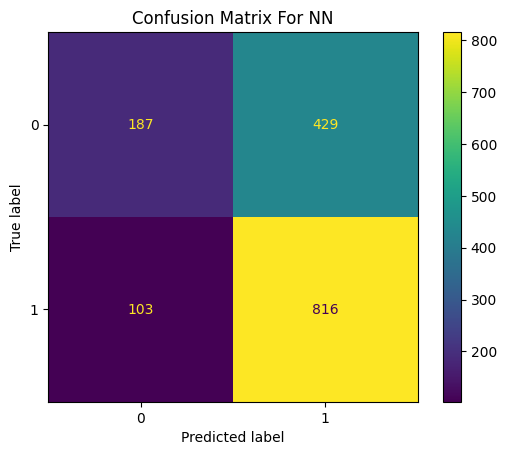

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define your confusion matrix
conf_matrix = np.array([[187, 429],
 [103, 816]])

from sklearn import metrics

# Create a ConfusionMatrixDisplay object
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])

# Set a custom color palette (e.g., 'coolwarm')
sns.set_palette("coolwarm")

# Plot the confusion matrix
cm_display.plot()
plt.title('Confusion Matrix For NN')
plt.show()


In [1]:
import seaborn as sns
import matplotlib.pyplot as plta




# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'plt' is not defined

FEature importance

Shape of feature_importances: (1, 384)


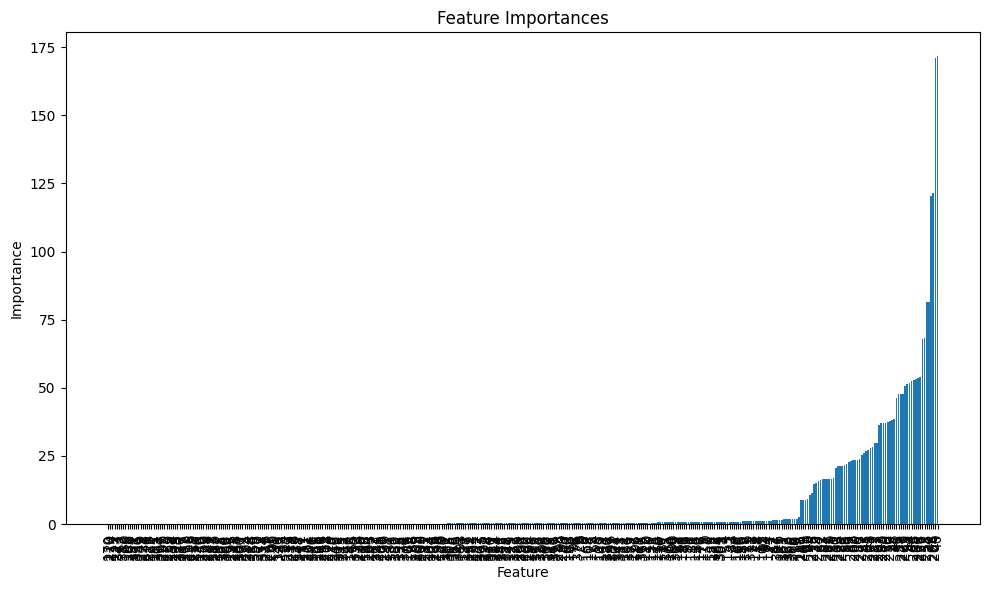

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming lda has been trained and lda.coef_ contains the coefficients
feature_importances = np.abs(lda.coef_)

# Get feature names
feature_names = X.columns  # Assuming X is a pandas DataFrame with column names

# Check the shape of feature_importances
print("Shape of feature_importances:", feature_importances.shape)

# Plot feature importances if the shape is as expected
if feature_importances.ndim == 2:
    # Sort feature importances and corresponding feature names
    sorted_indices = feature_importances.argsort()[::-1]
    sorted_feature_importances = feature_importances[0, sorted_indices[0]]
    sorted_feature_names = feature_names[sorted_indices[0]]

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
    plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()
else:
    print("Unexpected shape of feature_importances array:", feature_importances.shape)


Precision-Recall Curve

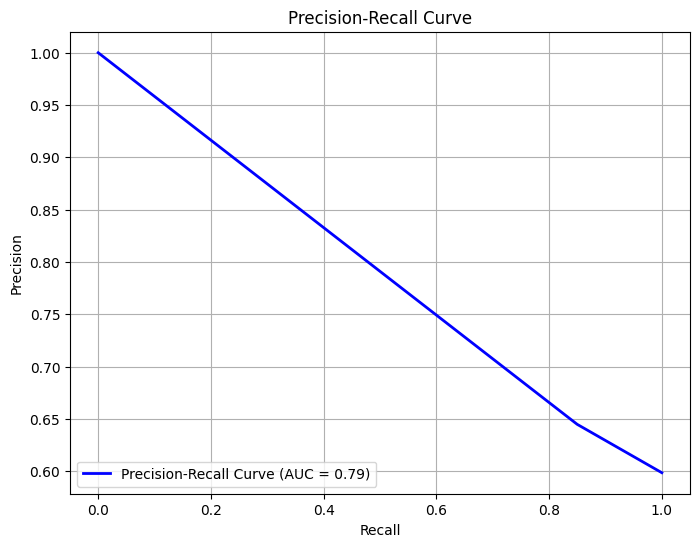

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Compute area under the curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve (AUC = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


#### SVM Model

In [31]:

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix

conf_matrix_SVM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_SVM)


Accuracy: 0.6058631921824105
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.02      0.05       616
         1.0       0.60      1.00      0.75       919

    accuracy                           0.61      1535
   macro avg       0.70      0.51      0.40      1535
weighted avg       0.68      0.61      0.47      1535

Confusion Matrix:
[[ 15 601]
 [  4 915]]


Plot of Confusion matrix for SVM


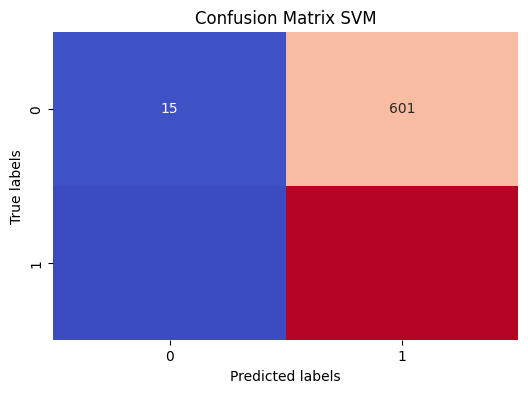

In [29]:
# Plot confusion matrix heatmap

custom_cmap = sns.color_palette("coolwarm", as_cmap=True)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_SVM, annot=True, cmap=custom_cmap, fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix SVM')
plt.show()

k-Nearest Neighbors (KNN):

0      False
1      False
2      False
3      False
4      False
       ...  
379    False
380    False
381    False
382    False
383    False
Length: 384, dtype: bool

In [46]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

x_test = X_test.values
# Make predictions on the testing data
y_pred = knn_classifier.predict(x_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix

conf_matrix_KNN = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_KNN)


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.7563517915309447
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.60      0.67       616
         1.0       0.76      0.86      0.81       919

    accuracy                           0.76      1535
   macro avg       0.75      0.73      0.74      1535
weighted avg       0.75      0.76      0.75      1535

Confusion Matrix:
[[372 244]
 [130 789]]


Confusion Matrix KNN

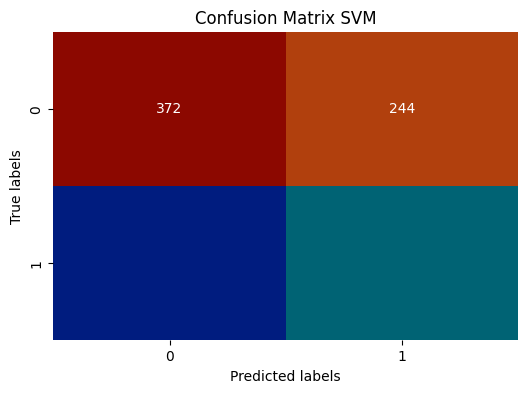

In [48]:
custom_cmap = sns.color_palette("dark", as_cmap=True)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_KNN, annot=True, cmap=custom_cmap, fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix SVM')
plt.show()

Neural Network (NN):

In [51]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the classifier
nn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nn_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix

conf_matrix_NN = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_NN)

Accuracy: 0.6534201954397394
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.30      0.41       616
         1.0       0.66      0.89      0.75       919

    accuracy                           0.65      1535
   macro avg       0.65      0.60      0.58      1535
weighted avg       0.65      0.65      0.62      1535

Confusion Matrix:
[[187 429]
 [103 816]]


Confusion matrix 

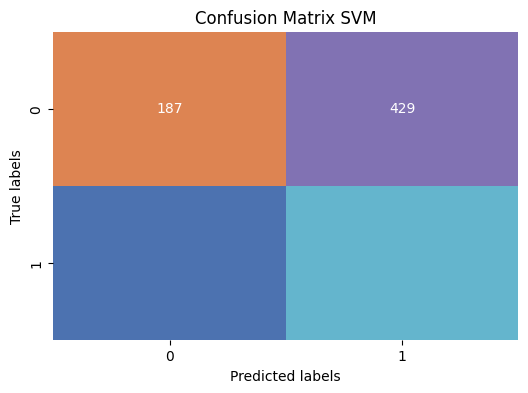

In [52]:
custom_cmap = sns.color_palette("deep", as_cmap=True)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_NN, annot=True, cmap=custom_cmap, fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix SVM')
plt.show()